In [1]:
#################################################
################  Import things #################
#################################################

import numpy as np
import timeit
import random
import copy
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle
import glycowork


In [4]:
from glycowork.glycan_data.loader import glycan_binding as gb

gb_glycans = list(gb.columns)

In [5]:
from glycowork.glycan_data.loader import glycomics_data_loader
df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe

df.head(20)

,glycan,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,control_6,tumor_6,control_7,tumor_7,control_8,tumor_8,control_9,tumor_9
0,GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc,2.755913,0.620301,3.019806,4.148615,2.413021,0.424605,1.764977,0.744528,4.518547,0.849240,3.174455,1.543922,3.752813,1.287601,1.574444,0.627539,4.415230,0.425039
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.775234,0.178490,0.778083,0.832907,0.824018,0.410873,0.617573,2.133773,0.603573,0.544599,1.317444,1.256997,0.860332,0.340373,0.927956,0.494144,1.045950,0.590404
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,9.219494,8.436141,16.190721,11.032313,16.061363,8.133529,12.291188,10.143781,10.865172,14.353894,12.313024,11.601938,13.246380,8.352032,12.352587,9.731834,16.170263,12.693331
3,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.770825,0.944913,1.531698,2.427562,1.570204,2.066165,2.832475,2.508954,2.228299,1.757840,4.811796,3.641077,1.437487,1.470697,2.324956,2.192553,0.805130,1.100490
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,35.912676,30.058418,48.420833,43.738436,46.692847,26.728713,39.971128,32.290024,51.472292,40.669153,41.927351,37.755641,43.701528,32.565498,47.145757,38.565763,44.683562,33.532942
5,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)...,0.664610,0.495280,1.451470,1.289237,1.331164,0.441114,0.657772,0.330536,0.654086,0.219399,1.433102,0.791533,0.722264,0.589715,1.337691,0.779090,1.734299,0.605036
6,Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,1.069934,1.735744,1.468105,1.509499,1.128653,1.812381,0.816789,6.345353,2.179460,1.261105,1.438459,4.410718,0.669910,1.310332,1.838577,0.989791,1.329698,1.392818
7,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]...,0.599954,1.213936,0.450138,0.469515,0.528332,2.891749,0.770085,0.853955,0.853148,4.776427,0.669361,1.323619,0.914651,1.027152,1.633415,4.333793,0.365928,3.162330
8,Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]...,6.005921,6.365952,5.623333,5.965819,5.299405,7.027606,10.523154,12.570391,4.753029,6.895145,12.325022,10.338465,5.401390,5.785955,7.054084,5.775716,11.549820,4.633692
9,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,3.557548,2.179078,2.341708,2.594836,2.408925,1.838783,3.403741,1.561446,1.909720,0.838742,1.389057,1.590800,2.557034,3.846191,0.765387,0.660688,1.428603,0.845144


In [4]:
from glycowork.glycan_data.loader import glycan_binding as gb

gb_glycans = list(gb.columns)

glycans_in_df = list(df['glycan'])

for glycan in glycans_in_df:
    if glycan in gb_glycans:
        print(glycan)

Gal(b1-3)[Neu5Ac(a2-6)]GalNAc
Neu5Ac(a2-3)Gal(b1-3)GalNAc
Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]GalNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc


In [50]:
gb.head()

,3-Anhydro-Gal(a1-3)Gal(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3-Anhydro-Gal(a1-3)Gal4S(b1-4)3-Anhydro-Gal2S(a1-3)Gal4S(b1-4)3-Anhydro-Gal(a1-3)Gal4S,3dGal(b1-3)[Fuc(a1-4)]Glc,3dGal(b1-4)Glc,4d8dNeu5Ac(a2-3)Gal(b1-4)Glc,4dNeu5Ac(a2-3)Gal(b1-4)Glc,7dNeu5Ac(a2-3)Gal(b1-4)Glc,...,wwwSflexneri5c,wwwSflexneriO2c,wwwSflexneriO5c,wwwSisomicin,wwwSmix,wwwTobramycin,wwwTyrS,wwwpHGGs,target,protein
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AADSIPSISPTGIITPTPTQSGMVSNCNKFYDVHSNDGCSAIASSQ...,TAL6-4LysM
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAFFSLVVLLALLPFGIHASALPSTELTPRVNPNLPGPNDVFVGFR...,rCnSL-proA
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AANEADYQAKLTAYQTELARVQKANADAKAAYEAAVAANNAANAAL...,AntigenI/IIA3VP1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AASKLGVPQPAQRDQVNCQLYAVQPNDNCIDISSKNNITYAQLLSW...,TAL6-6LysM
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACNNEWEDEQYEQYISFKSPIPAGGEGVTDIYVRYKEDGKVTYRLP...,SP15308A-bot-339-19-339


In [76]:
for i, prot in enumerate(gb['protein']):
    if prot == "ConA":
        print(i)
        print(prot)
        print(gb['target'][i])

    if prot == "WGA":
        print(i)
        print(prot)
        print(gb['target'][i])

v = gb[gb['protein'] == "ConA"]['target'].iloc[0]
v = gb[gb['protein'] == "WGA"]['target'].iloc[0]
print(v)

print(gb.iloc[407]['protein'])


34
ConA
ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVDKRLSAVVSYPNADSATVSYDVDLDNVLPEWVRVGLSASTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGTDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFEATFTFLIKSPDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN
407
ConA
MAISKKSSLFLPIFTFITMFLMVVNKVSSSTHETNALHFMFNQFSKDQKDLILQGDATTGTDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFEATFTFLIKSPDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDANVIRNSTTIDFNAAYNADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVDKRLSAVVSYPNADSATVSYDVDLDNVLPEWVRVGLSASTGLYKETNTILSWSFTSKLKSNEIPDIATVV
1344
WGA
QRCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRCGSQAGGATCPNNHCCSQYGHCGFGAEYCGAGCQGGPCRADIKCGSQSGGKLCPNNLCCSQWGFCGLGSEFCGGGCQSGACSTDKPCGKDAGGRVCTNNYCCSKWGSCGIGPGYCGAGCQSGGCDAVFAGAITANSTLLAE
QRCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRCGSQAGGATCPNNHCCSQYGHCGFGAEYCGAGCQGGPCRADIKCGSQSGGKLCPNNLCCSQWGFCGLGSEFCGGGCQSGACSTDKPCGKDAGGRVCTNNYCCSKWGSCGIGPGYCGAGCQSGGCDAVFAGAITANSTLLAE
ConA


In [20]:
import pandas as pd

# Get all dataset names (strings)
datasets = dir(glycomics_data_loader)

# Optional: filter out private/internal attributes
datasets = [name for name in datasets if not name.startswith('_')]

# Loop through each dataset
for name in datasets:
    # Get the DataFrame object from the loader
    df = getattr(glycomics_data_loader, name)

    print(name)
    print(len(df.columns))


HIV_gagtransfection_N_PMID35112714
13
HIV_gagtransfection_O_PMID35112714
13
human_brain_GSL_PMID38343116
11
human_brain_N_PMID38343116
11
human_brain_O_PMID38343116
8
human_colorectal_N_PMID26085185
11
human_colorectal_O_PMC9254241
30
human_colorectal_O_PMID19152289
7
human_gastric_O_PMC4816881
4
human_gastric_O_PMC5762837
13
human_gastric_O_PMC7226152
7
human_gastric_O_PMID28461410
18
human_leukemia_N_PMID34646384
8
human_leukemia_O_PMID34646384
21
human_liver_O_PMC5383776
7
human_liver_O_PMC9254241
10
human_ovarian_O_PMC4468167
20
human_platelets_N_PMID36952551
7
human_platelets_O_PMID36952551
7
human_prostate_N_PMC8010466
56
human_prostate_O_PMC8010466
56
human_retina_GSL_PMC5173345
43
human_serum_bacteremia_N_PMID33535571
72
human_skin_O_PMC5871710
19
human_skin_O_PMC5871710_BCC
41
human_skin_O_PMC5871710_SCC
21
mouse_brain_GSL_PMID39375371
37
time_series_HMO_PMID22649065
17
time_series_N_PMID32149347
101
time_series_O_PMID32149347
16


In [6]:
df = glycomics_data_loader.time_series_N_PMID32149347 # imports as a Pandas dataframe

df.head(20)

,ID,GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,Man(b1-4)GlcNAc(b1-4)GlcNAc,Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,Man(a1-6)Man(b1-4)GlcNAc(b1-4)GlcNAc,Man(a1-6)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc.1,Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,Man(a1-?)Man(a1-?)[Man(a1-?)]Man(b1-4)GlcNAc(b1-4)GlcNAc,...,Neu5Ac(a2-8)Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-?)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-?)]Man(a1-?)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-?)]Man(b1-4)GlcNAc(b1-4)GlcNAc,{Fuc(a1-?)}Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-?)]Man(a1-?)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-?)]Man(b1-4)GlcNAc(b1-4)GlcNAc,{Fuc(a1-?)}Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-?)]Man(a1-?)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-?)]Man(b1-4)GlcNAc(b1-4)GlcNAc.1,Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-?)Man(b1-4)GlcNAc(b1-4)GlcNAc,Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-?)Man(b1-4)GlcNAc(b1-4)GlcNAc.1,{GlcNAc(b1-?)}Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,{GlcNAc(b1-?)}Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc.1,{GlcNAc(b1-?)}Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc.2,{GlcNAc(b1-?)}Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc.3,{GlcNAc(b1-?)}Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-?)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc.4
0,D1_d0_1,0.96,0.61,1.27,5.58,12.40,0.77,1.59,3.76,1.07,...,1.07,0.07,0.17,0.07,0.14,0.09,0.05,0.09,0.13,0.06
1,D1_d0_2,0.99,0.89,1.56,6.69,12.51,0.83,1.90,4.14,1.21,...,0.73,0.07,0.18,0.03,0.07,0.06,0.02,0.05,0.08,0.04
2,D1_d0_3,1.32,1.18,2.22,9.07,16.77,1.10,2.66,5.31,1.50,...,0.41,0.05,0.10,0.05,0.09,0.04,0.02,0.04,0.08,0.06
3,D1_d1_1,0.49,0.39,0.88,4.00,8.65,0.59,1.27,3.07,0.89,...,1.63,0.10,0.27,0.04,0.09,0.07,0.06,0.10,0.12,0.07
4,D1_d1_2,0.81,0.94,1.50,6.46,11.90,0.75,1.65,3.82,1.10,...,0.93,0.09,0.22,0.04,0.08,0.05,0.04,0.07,0.12,0.06
5,D1_d1_3,0.76,0.71,1.43,6.31,11.41,0.74,2.00,4.07,1.11,...,0.65,0.07,0.21,0.03,0.07,0.05,0.03,0.07,0.08,0.06
6,D1_d3_1,0.51,0.36,0.93,3.55,8.00,0.57,1.23,3.06,0.90,...,1.89,0.10,0.26,0.04,0.09,0.09,0.06,0.12,0.16,0.10
7,D1_d3_2,0.83,0.94,1.23,5.02,10.15,0.70,1.52,3.50,0.99,...,1.12,0.07,0.20,0.03,0.10,0.04,0.05,0.09,0.11,0.08
8,D1_d3_3,0.82,0.68,1.67,6.01,13.37,0.86,2.14,4.79,1.30,...,0.55,0.05,0.15,0.04,0.08,0.04,0.02,0.05,0.07,0.05
9,D1_d5_1,0.27,0.30,0.52,4.68,7.65,0.39,1.96,2.15,0.60,...,3.25,0.10,0.28,0.05,0.10,0.10,0.07,0.14,0.18,0.13


In [15]:
datasets = dir(glycomics_data_loader)


df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe

df.head(20)

,glycan,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,control_6,tumor_6,control_7,tumor_7,control_8,tumor_8,control_9,tumor_9
0,GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc,2.755913,0.620301,3.019806,4.148615,2.413021,0.424605,1.764977,0.744528,4.518547,0.849240,3.174455,1.543922,3.752813,1.287601,1.574444,0.627539,4.415230,0.425039
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.775234,0.178490,0.778083,0.832907,0.824018,0.410873,0.617573,2.133773,0.603573,0.544599,1.317444,1.256997,0.860332,0.340373,0.927956,0.494144,1.045950,0.590404
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,9.219494,8.436141,16.190721,11.032313,16.061363,8.133529,12.291188,10.143781,10.865172,14.353894,12.313024,11.601938,13.246380,8.352032,12.352587,9.731834,16.170263,12.693331
3,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.770825,0.944913,1.531698,2.427562,1.570204,2.066165,2.832475,2.508954,2.228299,1.757840,4.811796,3.641077,1.437487,1.470697,2.324956,2.192553,0.805130,1.100490
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,35.912676,30.058418,48.420833,43.738436,46.692847,26.728713,39.971128,32.290024,51.472292,40.669153,41.927351,37.755641,43.701528,32.565498,47.145757,38.565763,44.683562,33.532942
5,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)...,0.664610,0.495280,1.451470,1.289237,1.331164,0.441114,0.657772,0.330536,0.654086,0.219399,1.433102,0.791533,0.722264,0.589715,1.337691,0.779090,1.734299,0.605036
6,Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,1.069934,1.735744,1.468105,1.509499,1.128653,1.812381,0.816789,6.345353,2.179460,1.261105,1.438459,4.410718,0.669910,1.310332,1.838577,0.989791,1.329698,1.392818
7,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]...,0.599954,1.213936,0.450138,0.469515,0.528332,2.891749,0.770085,0.853955,0.853148,4.776427,0.669361,1.323619,0.914651,1.027152,1.633415,4.333793,0.365928,3.162330
8,Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]...,6.005921,6.365952,5.623333,5.965819,5.299405,7.027606,10.523154,12.570391,4.753029,6.895145,12.325022,10.338465,5.401390,5.785955,7.054084,5.775716,11.549820,4.633692
9,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,3.557548,2.179078,2.341708,2.594836,2.408925,1.838783,3.403741,1.561446,1.909720,0.838742,1.389057,1.590800,2.557034,3.846191,0.765387,0.660688,1.428603,0.845144


In [10]:
# need to previously `run pip3 install esm`
import esm.pretrained
from glycowork.ml.inference import get_esm1b_representations, get_lectin_preds
from glycowork.ml.models import prep_model


model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S() # will need to download if the first time

C:\Users\csfloyd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [91]:
leor = prep_model('LectinOracle', 1, trained = True)

In [ ]:
# see examples from https://colab.research.google.com/github/BojarLab/glycowork/blob/master/05_examples.ipynb#scrollTo=honest-giant

prot_seq = "AADSIPSISPTGIITPTPTQSGMVSNCNKFYDVHSNDGCSAIASSQ"
rep = get_esm1b_representations([prot_seq], model, alphabet)


predictions = get_lectin_preds(prot_seq, glycans_in_df, leor, rep)
print(predictions)
#print(predictions['pred'])

                                                motif      pred
9   Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga... -0.289560
11  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)... -0.258926
7   Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]... -0.238169
1                       Gal(b1-3)[Neu5Ac(a2-6)]GalNAc -0.214159
4           Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc -0.210999
0                     GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc -0.209233
10  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga... -0.137875
12  Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-... -0.127279
2                         Neu5Ac(a2-3)Gal(b1-3)GalNAc -0.111119
5   Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)... -0.109295
8   Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]... -0.049835
6     Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc -0.046738
3              Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc  0.010438


In [90]:
type(prot_seq_list[0])
type("AADSIPSISPTGIITPTPTQSGMVSNCNKFYDVHSNDGCSAIASSQ")

str

In [9]:
prot_seq_list = []
prot_seq_list.append(gb[gb['protein'] == "ConA"]['target'].iloc[0])
prot_seq_list.append(gb[gb['protein'] == "WGA"]['target'].iloc[0])

n_gly = len(glycans_in_df)
n_prots = len(prot_seq_list)
z_score_mat = np.zeros((n_prots, n_gly))

for (p, prot_seq) in enumerate(prot_seq_list):
    rep = get_esm1b_representations([prot_seq], model, alphabet)
    predictions = get_lectin_preds(prot_seq, glycans_in_df, leor, rep)
    z_scores = list([predictions['pred'][i] for i in range(len(predictions['pred']))])
    z_score_mat[p,:] = z_scores




NameError: name 'get_esm1b_representations' is not defined

In [7]:
from glycowork.glycan_data.loader import glycomics_data_loader
df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe
glycans_in_df = list(df['glycan'])

In [129]:
df.head()

,glycan,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,control_6,tumor_6,control_7,tumor_7,control_8,tumor_8,control_9,tumor_9
0,GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc,2.755913,0.620301,3.019806,4.148615,2.413021,0.424605,1.764977,0.744528,4.518547,0.849240,3.174455,1.543922,3.752813,1.287601,1.574444,0.627539,4.415230,0.425039
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.775234,0.178490,0.778083,0.832907,0.824018,0.410873,0.617573,2.133773,0.603573,0.544599,1.317444,1.256997,0.860332,0.340373,0.927956,0.494144,1.045950,0.590404
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,9.219494,8.436141,16.190721,11.032313,16.061363,8.133529,12.291188,10.143781,10.865172,14.353894,12.313024,11.601938,13.246380,8.352032,12.352587,9.731834,16.170263,12.693331
3,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.770825,0.944913,1.531698,2.427562,1.570204,2.066165,2.832475,2.508954,2.228299,1.757840,4.811796,3.641077,1.437487,1.470697,2.324956,2.192553,0.805130,1.100490
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,35.912676,30.058418,48.420833,43.738436,46.692847,26.728713,39.971128,32.290024,51.472292,40.669153,41.927351,37.755641,43.701528,32.565498,47.145757,38.565763,44.683562,33.532942


In [8]:
aff_mat = np.exp(0.2 * z_score_mat)
print(aff_mat)

def prob_dist(vals):
    return vals / np.sum(vals)

NameError: name 'z_score_mat' is not defined

In [137]:
group1_list = list(df.columns)[1:-1:2]
group2_list = list(df.columns)[2:-1:2]

activation1_array = np.zeros((len(group1_list), 2))
for (i, g) in enumerate(group1_list):
    glycan_dist = prob_dist(np.array(df[g]))
    activation1_array[i,:] = np.dot(aff_mat, glycan_dist)


activation2_array = np.zeros((len(group2_list), 2))
for (i, g) in enumerate(group2_list):
    glycan_dist = prob_dist(np.array(df[g]))
    activation2_array[i,:] = np.dot(aff_mat, glycan_dist)

In [126]:
activation2_array

array([[0.40275825, 0.77498617],
       [0.40424607, 0.74449065],
       [0.41015974, 0.81003685],
       [0.43099077, 0.7973172 ],
       [0.42538376, 0.72558546],
       [0.42550455, 0.80023557],
       [0.39551569, 0.78812702],
       [0.41845677, 0.73818347]])

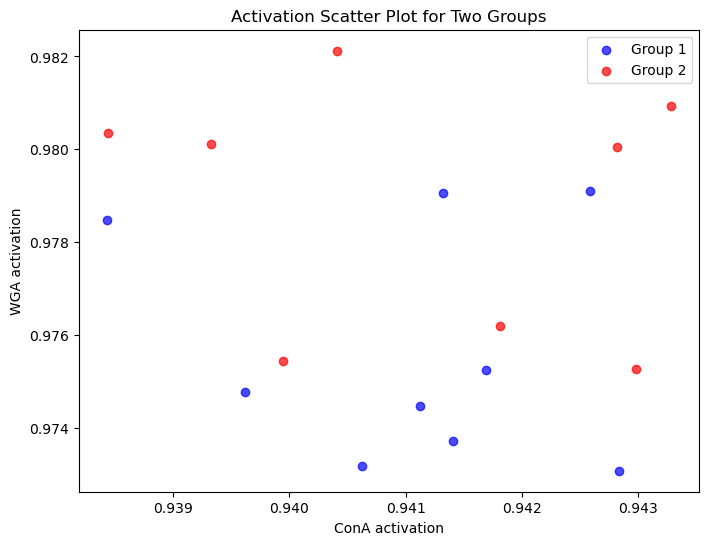

In [138]:
# Plot scatter plots for both groups
plt.figure(figsize=(8, 6))
plt.scatter(activation1_array[:,0], activation1_array[:,1], color='blue', label='Group 1', alpha=0.7)
plt.scatter(activation2_array[:,0], activation2_array[:,1], color='red', label='Group 2', alpha=0.7)

# Labels and legend
plt.xlabel('ConA activation')
plt.ylabel('WGA activation')
plt.title('Activation Scatter Plot for Two Groups')
plt.legend()
plt.show()